In [433]:
import pandas as pd
import numpy as np
import sys
import requests
import pprint

import datetime
import pytz
import importlib
import matplotlib.pyplot as plt


import datetime, json, math
from google.cloud import bigquery
from numpy_ext import rolling_apply as rolling_apply_ext

In [2]:
import os

if os.path.exists('credential.json'):
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.join(os.getcwd(), 'credential.json')

In [653]:
import algo.data.read

In [654]:
algo.data.read.df_okx_20231126_1201

symbol,1INCH-USD-SWAP,1INCH-USDT-SWAP,AAVE-USDT-SWAP,ADA-USD-SWAP,ADA-USDT-SWAP,AGIX-USDT-SWAP,AGLD-USDT-SWAP,AIDOGE-USDT-SWAP,ALGO-USD-SWAP,ALGO-USDT-SWAP,...,XTZ-USDT-SWAP,YFI-USD-SWAP,YFI-USDT-SWAP,YFII-USDT-SWAP,YGG-USDT-SWAP,ZEC-USD-SWAP,ZEC-USDT-SWAP,ZEN-USDT-SWAP,ZIL-USDT-SWAP,ZRX-USDT-SWAP
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-11-26 00:00:00,0.3716,0.371167,99.578636,0.394700,0.394253,NaN,0.949526,0.0,0.139900,0.140433,...,0.848083,8848.0,8868.037037,1063.052632,0.392171,30.151667,30.157857,10.448182,0.021446,0.430019
2023-11-26 00:01:00,0.3716,0.370920,99.552381,0.394700,0.394192,NaN,0.953238,0.0,0.139900,0.140354,...,0.847286,8848.0,8872.266667,1062.726667,0.392067,30.163333,30.152941,10.450167,0.021459,0.429038
2023-11-26 00:02:00,0.3716,0.371018,99.621818,0.394700,0.394137,NaN,0.955129,0.0,0.139900,0.140350,...,0.847091,8848.0,8865.466667,1062.780000,0.392000,30.163333,30.144000,10.454100,0.021454,0.428654
2023-11-26 00:03:00,0.3716,0.370988,99.556667,0.394433,0.394240,NaN,0.951733,0.0,0.139900,0.140350,...,0.848667,8848.0,8868.909091,1064.744444,0.391973,30.160000,30.148333,10.458000,0.021460,0.428876
2023-11-26 00:04:00,0.3716,0.370737,99.490000,0.394300,0.394183,NaN,0.950727,0.0,0.139900,0.140375,...,0.848273,8848.0,8864.692308,1068.032143,0.391700,30.160000,30.142500,10.451500,0.021456,0.428536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01 02:18:00,0.3435,0.343130,99.675455,0.378900,0.378642,0.302067,0.862091,0.0,0.134500,0.134422,...,0.834000,8342.0,8319.647059,1070.985714,0.383000,29.570000,29.566667,10.082333,0.021760,0.399268
2023-12-01 02:19:00,0.3435,0.343050,99.674000,0.378900,0.378700,0.301750,0.862500,0.0,0.134500,0.134400,...,0.833875,8342.0,8315.727273,1071.100000,0.382989,29.570000,29.560000,10.082500,0.021760,0.399800
2023-12-01 02:20:00,0.3435,0.343138,99.829000,0.378971,0.378956,0.301933,0.863800,0.0,0.134500,0.134467,...,0.834000,8342.0,8320.500000,1071.583333,0.382856,29.576667,29.575714,10.085333,0.021765,0.399633


In [672]:
df = algo.data.read.df_okx_20231126_1201.reset_index().melt(id_vars='timestamp', var_name='symbol', value_name='close')

In [668]:
df

,symbol,close
timestamp,,
2023-11-26 00:00:00,1INCH-USD-SWAP,0.371600
2023-11-26 00:01:00,1INCH-USD-SWAP,0.371600
2023-11-26 00:02:00,1INCH-USD-SWAP,0.371600
2023-11-26 00:03:00,1INCH-USD-SWAP,0.371600
2023-11-26 00:04:00,1INCH-USD-SWAP,0.371600
...,...,...
2023-12-01 02:18:00,ZRX-USDT-SWAP,0.399268
2023-12-01 02:19:00,ZRX-USDT-SWAP,0.399800
2023-12-01 02:20:00,ZRX-USDT-SWAP,0.399633


In [3]:
df = pd.concat([pd.read_pickle('algo/data/binance/df_binance_20230809.pkl'), pd.read_pickle('algo/data/binance/df_binance_20230810.pkl')])

In [673]:
df_close = df.pivot(index='timestamp', columns='symbol', values='close')

In [674]:
dfi = df.set_index(['timestamp', 'symbol'])

In [675]:
dfst = df.set_index(['symbol', 'timestamp'])

In [676]:
dfi

,,close
timestamp,symbol,
2023-11-26 00:00:00,1INCH-USD-SWAP,0.371600
2023-11-26 00:01:00,1INCH-USD-SWAP,0.371600
2023-11-26 00:02:00,1INCH-USD-SWAP,0.371600
2023-11-26 00:03:00,1INCH-USD-SWAP,0.371600
2023-11-26 00:04:00,1INCH-USD-SWAP,0.371600
...,...,...
2023-12-01 02:18:00,ZRX-USDT-SWAP,0.399268
2023-12-01 02:19:00,ZRX-USDT-SWAP,0.399800
2023-12-01 02:20:00,ZRX-USDT-SWAP,0.399633


In [677]:
dfst

close
symbol         timestamp                    
1INCH-USD-SWAP 2023-11-26 00:00:00  0.371600
               2023-11-26 00:01:00  0.371600
               2023-11-26 00:02:00  0.371600
               2023-11-26 00:03:00  0.371600
               2023-11-26 00:04:00  0.371600
...                                      ...
ZRX-USDT-SWAP  2023-12-01 02:18:00  0.399268
               2023-12-01 02:19:00  0.399800
               2023-12-01 02:20:00  0.399633
               2023-12-01 02:21:00  0.399361
               2023-12-01 02:22:00  0.399533

[1313392 rows x 1 columns]

In [678]:
dfst.index.get_level_values(0)[0]

'1INCH-USD-SWAP'

In [681]:
dfs = dfi.xs('MANA-USDT-SWAP', level=1)

<Axes: xlabel='timestamp'>

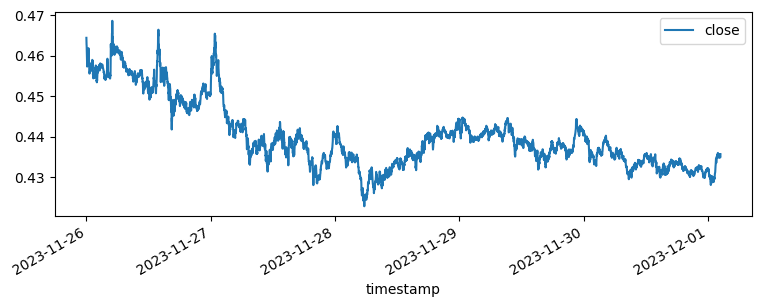

In [682]:
dfs[['close']].plot(figsize=(9,3))

In [679]:
all_symbols = df.symbol.unique()

In [680]:
all_symbols

array(['1INCH-USD-SWAP', '1INCH-USDT-SWAP', 'AAVE-USDT-SWAP',
       'ADA-USD-SWAP', 'ADA-USDT-SWAP', 'AGIX-USDT-SWAP',
       'AGLD-USDT-SWAP', 'AIDOGE-USDT-SWAP', 'ALGO-USD-SWAP',
       'ALGO-USDT-SWAP', 'ALPHA-USDT-SWAP', 'ANT-USDT-SWAP',
       'APE-USDT-SWAP', 'API3-USDT-SWAP', 'APT-USDT-SWAP', 'AR-USDT-SWAP',
       'ARB-USDT-SWAP', 'ATOM-USD-SWAP', 'ATOM-USDT-SWAP',
       'AVAX-USD-SWAP', 'AVAX-USDT-SWAP', 'AXS-USDT-SWAP',
       'BADGER-USDT-SWAP', 'BAL-USDT-SWAP', 'BAND-USDT-SWAP',
       'BAT-USDT-SWAP', 'BCH-USD-SWAP', 'BCH-USDT-SWAP', 'BICO-USDT-SWAP',
       'BIGTIME-USDT-SWAP', 'BLUR-USDT-SWAP', 'BNB-USDT-SWAP',
       'BNT-USDT-SWAP', 'BSV-USD-SWAP', 'BSV-USDT-SWAP', 'BTC-USD-SWAP',
       'BTC-USDC-SWAP', 'BTC-USDT-SWAP', 'CEL-USDT-SWAP',
       'CELO-USDT-SWAP', 'CETUS-USDT-SWAP', 'CFX-USDT-SWAP',
       'CHZ-USDT-SWAP', 'COMP-USDT-SWAP', 'CORE-USDT-SWAP',
       'CRO-USDT-SWAP', 'CRV-USD-SWAP', 'CRV-USDT-SWAP', 'CSPR-USDT-SWAP',
       'CVC-USDT-SWAP', 'DASH-USD-SWA

In [577]:
def get_changes(values):
    '''
    values is a 2 dimensional array.
    '''
    l, m = values.shape
    if l < 1: return {}

    ch_largest, ch_smallest = np.zeros(m), np.zeros(m)
    distance_largest_ch, distance_smallest_ch = np.ones(m), np.ones(m)
    ch_since_largest, ch_since_smallest = np.zeros(m), np.zeros(m)

    head_i, tail_i = 1, l-2
    fisrt_v, last_v = values[0], values[-1]
    
    for i, v in enumerate(values):
        if i < head_i or i > tail_i: continue
        ch = (v - fisrt_v) / fisrt_v
        ch_since = (last_v - v) / v
        d =  l-1-i
        distance_largest_ch = np.where(np.greater(ch_largest, ch), distance_largest_ch, d)
        distance_smallest_ch = np.where(np.less(ch_smallest, ch), distance_smallest_ch, d)
        ch_since_largest = np.where(np.greater(ch_largest, ch), ch_since_largest, ch_since)
        ch_since_smallest = np.where(np.less(ch_smallest, ch), ch_since_smallest, ch_since)
        ch_largest = np.where(np.greater(ch_largest, ch), ch_largest, ch)
        ch_smallest = np.where(np.less(ch_smallest, ch), ch_smallest, ch)

    #"""
    return {
        'ch_largest': ch_largest, 'ch_smallest': ch_smallest,
        'ch_since_largest': ch_since_largest, 'ch_since_smallest': ch_since_smallest,
        'distance_largest_ch': distance_largest_ch, 'distance_smallest_ch': distance_smallest_ch,
        }
    #"""
    #return ch_largest, ch_smallest


In [28]:
changes = get_changes(df_close[list(df_close.columns)].values)

In [29]:
len(changes['ch_largest'])

648

In [30]:
dfi.loc[dfi.index.get_level_values(0)[-1],'ch_largest'] = changes['ch_largest']

In [31]:
dfi.loc[dfi.index.get_level_values(0)[-1],:]

,open,high,low,close,volume,ch_largest
symbol,,,,,,
1INCHBUSD,0.30700,0.30700,0.30700,0.30700,0.000,0.008154
1INCHUSDT,0.30740,0.30740,0.30740,0.30740,162.600,0.005854
AAVEBUSD,67.02000,67.02000,67.02000,67.02000,0.000,0.048044
AAVEUSDT,67.11000,67.12000,67.09000,67.09000,10.029,0.046634
ACABUSD,0.05720,0.05720,0.05720,0.05720,0.000,0.027730
...,...,...,...,...,...,...
ZENUSDT,8.62000,8.62000,8.62000,8.62000,0.000,0.011468
ZILBUSD,0.02001,0.02001,0.02001,0.02001,0.000,0.004965
ZILUSDT,0.02004,0.02004,0.02004,0.02004,0.000,0.005456


In [32]:
dfi.xs(dfi.index.get_level_values(1)[-1], level=1)

,open,high,low,close,volume,ch_largest
timestamp,,,,,,
2023-08-09 00:00:00+00:00,0.2159,0.2159,0.2157,0.2157,2201.0,NaN
2023-08-09 00:01:00+00:00,0.2157,0.2157,0.2157,0.2157,0.0,NaN
2023-08-09 00:02:00+00:00,0.2160,0.2160,0.2160,0.2160,74.0,NaN
2023-08-09 00:03:00+00:00,0.2161,0.2162,0.2161,0.2162,1313.0,NaN
2023-08-09 00:04:00+00:00,0.2162,0.2162,0.2162,0.2162,0.0,NaN
...,...,...,...,...,...,...
2023-08-10 23:55:00+00:00,0.2124,0.2124,0.2124,0.2124,1866.0,NaN
2023-08-10 23:56:00+00:00,0.2124,0.2124,0.2124,0.2124,0.0,NaN
2023-08-10 23:57:00+00:00,0.2124,0.2124,0.2124,0.2124,0.0,NaN


In [578]:
dfs = dfi.xs('AKROBUSD', level=1)

In [652]:
import algo.jitter_recovery.calculate

In [648]:
jitter_recovery_trading_param = JitterRecoveryTradingParam.get_default_param()

In [649]:
str(jitter_recovery_trading_param.jitter_recover_feature_param)

'jump_window: 30'

In [650]:
df_feature = algo.jitter_recovery.calculate.get_feature_df(dfs, jitter_recovery_trading_param.jitter_recover_feature_param)

In [651]:
df_trading = algo.jitter_recovery.calculate.add_trading_columns(df_feature, jitter_recovery_trading_param)

<Axes: xlabel='timestamp'>

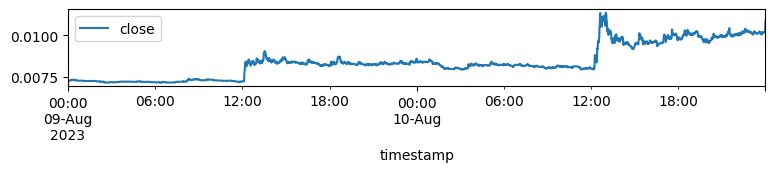

In [583]:
dfs[['close']].plot(figsize=(9,1))

<Axes: xlabel='timestamp'>

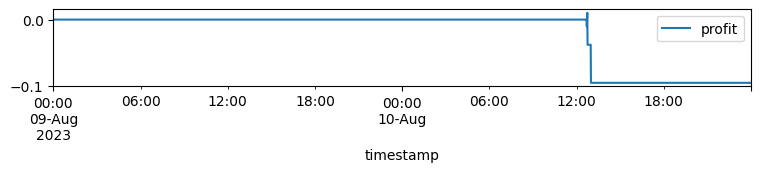

In [584]:
df_trading[['profit']].cumsum().plot(figsize=(9,1))

<Axes: xlabel='timestamp'>

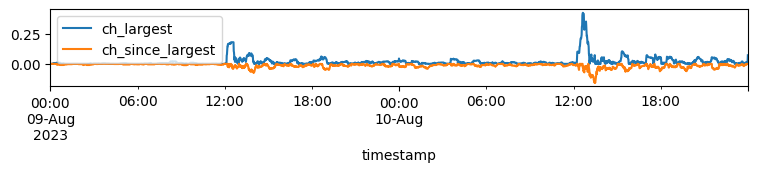

In [585]:
df_trading[['ch_largest', 'ch_since_largest']].plot(figsize=(9,1))

<Axes: xlabel='timestamp'>

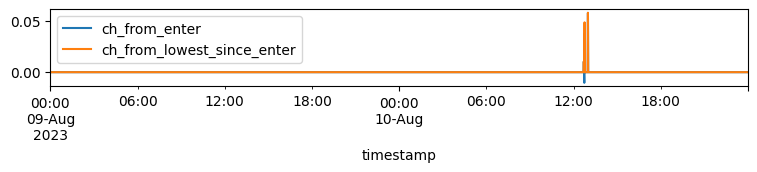

In [586]:
df_trading[['ch_from_enter', 'ch_from_lowest_since_enter']].plot(figsize=(9,1))

<Axes: xlabel='timestamp'>

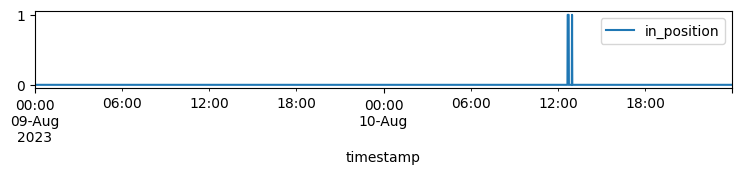

In [587]:
df_trading[['in_position']].plot(figsize=(9,1))

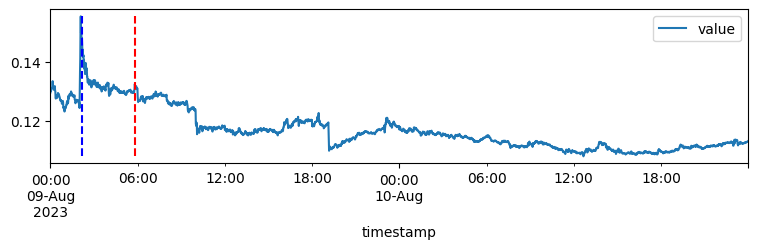

In [531]:
ax = df_trading[['value']].plot(figsize=(9,2))
ymin, ymax = df_trading[['value']].min(), df_trading[['value']].max()

ax.vlines(x=list(df_trading[df_trading.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(df_trading[df_trading.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='dashed', label='enter')

plt.show()

In [594]:
symbol_with_jumps = [s for s in list(set(list(dfst[dfst.ch_largest > 0.15].index.get_level_values(0)))) if 'USDT' in s]
symbol_with_jumps

['AKROUSDT',
 'CLVUSDT',
 'BNTUSDT',
 'DREPUSDT',
 'DODOUSDT',
 'APTUSDT',
 'OXTUSDT']

In [569]:
df_trading.columns

Index(['value', 'ch_largest', 'ch_smallest', 'ch_since_largest',
       'ch_since_smallest', 'distance_largest_ch', 'distance_smallest_ch',
       'in_position', 'value_at_enter', 'position_changed',
       'lowest_since_enter', 'timedelta_since_position_enter', 'ch_from_enter',
       'ch_from_lowest_since_enter', 'profit_raw', 'profit'],
      dtype='object')

In [574]:

dfs = dfi.xs(all_symbols[0], level=1)
df_feature = get_feature_df(dfs, 30)
df_trading = add_trading_columns(df_feature)
for column in df_trading.columns:
    dfst.loc[symbol, column] = df_trading[column].values

In [627]:
jitter_recover_trading_param = JitterRecoveryTradingParam.get_default_param()
for symbol in symbol_with_jumps:
    if 'USDT' not in symbol: continue
    dfs = dfi.xs(symbol, level=1)
    df_feature = get_feature_df(dfs, jitter_recover_trading_param.jitter_recover_feature_param)
    df_trading = add_trading_columns(df_feature, jitter_recover_trading_param)
    for column in df_trading.columns:
        dfst.loc[symbol, column] = df_trading[column].values

In [628]:
len(all_symbols)

648

In [629]:
dfst.columns

Index(['open', 'high', 'low', 'close', 'volume', 'value', 'ch_largest',
       'ch_smallest', 'ch_since_largest', 'ch_since_smallest',
       'distance_largest_ch', 'distance_smallest_ch', 'in_position',
       'value_at_enter', 'position_changed', 'lowest_since_enter',
       'timedelta_since_position_enter', 'ch_from_enter',
       'ch_from_lowest_since_enter', 'profit_raw', 'profit'],
      dtype='object')

<Axes: xlabel='timestamp'>

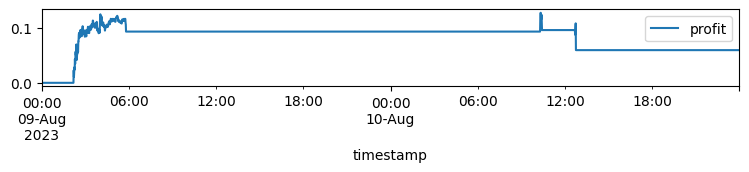

In [630]:
dfst[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(9,1))

In [613]:
dfst[['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
AKROUSDT,-0.036290
1INCHBUSD,0.000000
OSMOUSDT,0.000000
PAXGBUSD,0.000000
PAXGUSDT,0.000000
...,...
FDUSDUSDT,0.000000
FETBUSD,0.000000
FIDABUSD,0.000000


In [338]:
list(set(list(dfst[dfst.ch_largest > 0.15].index.get_level_values(0))))

['AKROUSDT',
 'AKROBUSD',
 'CLVBUSD',
 'OXTUSDT',
 'CLVUSDT',
 'BNTUSDT',
 'DREPUSDT',
 'APTUSDT',
 'APTBUSD',
 'DODOUSDT',
 'DREPBUSD',
 'SNMBUSD',
 'DODOBUSD']

In [340]:
dfst[(dfst.ch_largest > 0.15) & (dfst.ch_since_largest < 0)]

open     high      low    close  \
symbol   timestamp                                                       
AKROBUSD 2023-08-09 12:14:00+00:00  0.00841  0.00847  0.00826  0.00837   
         2023-08-09 12:15:00+00:00  0.00838  0.00840  0.00807  0.00817   
         2023-08-09 12:16:00+00:00  0.00815  0.00825  0.00801  0.00822   
         2023-08-09 12:17:00+00:00  0.00822  0.00825  0.00812  0.00822   
         2023-08-09 12:18:00+00:00  0.00822  0.00822  0.00808  0.00815   
...                                     ...      ...      ...      ...   
OXTUSDT  2023-08-10 10:14:00+00:00  0.08810  0.08880  0.08790  0.08830   
         2023-08-10 10:15:00+00:00  0.08830  0.08900  0.08820  0.08890   
         2023-08-10 10:16:00+00:00  0.08890  0.08990  0.08880  0.08920   
         2023-08-10 10:17:00+00:00  0.08920  0.08940  0.08850  0.08900   
         2023-08-10 10:18:00+00:00  0.08900  0.08920  0.08660  0.08680   

                                       volume  ch_largest  ch_smallest  \
symbol   timestamp                                                       
AKROBUSD 2023-08-09 12:14:00+00:00  2365736.0    0.166667    -0.002778   
         2023-08-09 12:15:00+00:00  5403170.0    0.169916     0.000000   
         2023-08-09 12:16:00+00:00  2602787.0    0.169916     0.000000   
         2023-08-09 12:17:00+00:00  1718583.0    0.169916     0.000000   
         2023-08-09 12:18:00+00:00   470238.0    0.168289     0.000000   
...                                       ...         ...          ...   
OXTUSDT  2023-08-10 10:14:00+00:00  1216137.0    0.193631    -0.011465   
         2023-08-10 10:15:00+00:00   637241.0    0.199744    -0.006402   
         2023-08-10 10:16:00+00:00  1286884.0    0.201282    -0.005128   
         2023-08-10 10:17:00+00:00   440919.0    0.207474     0.000000   
         2023-08-10 10:18:00+00:00  1581124.0    0.207474     0.000000   

                                    ch_since_largest  ch_since_smallest  \
symbol   timestamp                                                        
AKROBUSD 2023-08-09 12:14:00+00:00         -0.003571           0.165738   
         2023-08-09 12:15:00+00:00         -0.027381           0.137883   
         2023-08-09 12:16:00+00:00         -0.021429           0.144847   
         2023-08-09 12:17:00+00:00         -0.021429           0.144847   
         2023-08-09 12:18:00+00:00         -0.029762           0.133519   
...                                              ...                ...   
OXTUSDT  2023-08-10 10:14:00+00:00         -0.057631           0.137887   
         2023-08-10 10:15:00+00:00         -0.051227           0.145619   
         2023-08-10 10:16:00+00:00         -0.048026           0.149485   
         2023-08-10 10:17:00+00:00         -0.050160           0.146907   
         2023-08-10 10:18:00+00:00         -0.073639           0.118557   

                                    distance_largest_ch  distance_smallest_ch  
symbol   timestamp                                                             
AKROBUSD 2023-08-09 12:14:00+00:00                  1.0                  26.0  
         2023-08-09 12:15:00+00:00                  2.0                  27.0  
         2023-08-09 12:16:00+00:00                  3.0                  28.0  
         2023-08-09 12:17:00+00:00                  4.0                  29.0  
         2023-08-09 12:18:00+00:00                  5.0                  24.0  
...                                                 ...                   ...  
OXTUSDT  2023-08-10 10:14:00+00:00                 12.0                  25.0  
         2023-08-10 10:15:00+00:00                 13.0                  26.0  
         2023-08-10 10:16:00+00:00                 14.0                  27.0  
         2023-08-10 10:17:00+00:00                 15.0                  28.0  
         2023-08-10 10:18:00+00:00                 16.0                  29.0  

[254 rows x 11 columns]

In [339]:
dfst[(dfst.ch_largest > 0.15) & (dfst.ch_since_largest < 0)].loc['AKROBUSD']

,open,high,low,close,volume,ch_largest,ch_smallest,ch_since_largest,ch_since_smallest,distance_largest_ch,distance_smallest_ch
timestamp,,,,,,,,,,,
2023-08-09 12:14:00+00:00,0.00841,0.00847,0.00826,0.00837,2365736.0,0.166667,-0.002778,-0.003571,0.165738,1.0,26.0
2023-08-09 12:15:00+00:00,0.00838,0.00840,0.00807,0.00817,5403170.0,0.169916,0.000000,-0.027381,0.137883,2.0,27.0
2023-08-09 12:16:00+00:00,0.00815,0.00825,0.00801,0.00822,2602787.0,0.169916,0.000000,-0.021429,0.144847,3.0,28.0
2023-08-09 12:17:00+00:00,0.00822,0.00825,0.00812,0.00822,1718583.0,0.169916,0.000000,-0.021429,0.144847,4.0,29.0
2023-08-09 12:18:00+00:00,0.00822,0.00822,0.00808,0.00815,470238.0,0.168289,0.000000,-0.029762,0.133519,5.0,24.0
2023-08-09 12:19:00+00:00,0.00817,0.00850,0.00816,0.00829,5936551.0,0.168289,0.000000,-0.013095,0.152990,6.0,25.0
2023-08-09 12:20:00+00:00,0.00825,0.00831,0.00824,0.00831,427091.0,0.168289,0.000000,-0.010714,0.155772,7.0,26.0
2023-08-09 12:22:00+00:00,0.00844,0.00850,0.00826,0.00840,2173266.0,0.176634,0.000000,-0.007092,0.168289,1.0,28.0
2023-08-09 12:23:00+00:00,0.00840,0.00847,0.00836,0.00838,877427.0,0.176634,0.000000,-0.009456,0.165508,2.0,29.0


In [293]:
dfst.index.get_level_values(0)[0]

'1INCHBUSD'

In [304]:
for column in df_feature.columns:
    dfst.loc[dfst.index.get_level_values(0)[0], column] = df_feature[column].values

In [305]:
dfst.loc[dfst.index.get_level_values(0)[0]]

,open,high,low,close,volume,ch_largest,ch_smallest,ch_since_largest,ch_since_smallest,distance_largest_ch,distance_smallest_ch
timestamp,,,,,,,,,,,
2023-08-09 00:00:00+00:00,0.3066,0.3066,0.3066,0.3066,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2023-08-09 00:01:00+00:00,0.3066,0.3066,0.3066,0.3066,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2023-08-09 00:02:00+00:00,0.3066,0.3066,0.3066,0.3066,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2023-08-09 00:03:00+00:00,0.3066,0.3066,0.3066,0.3066,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2023-08-09 00:04:00+00:00,0.3066,0.3066,0.3066,0.3066,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-10 23:55:00+00:00,0.3070,0.3070,0.3070,0.3070,0.0,0.000326,0.0,0.0,0.000326,0.0,11.0
2023-08-10 23:56:00+00:00,0.3070,0.3070,0.3070,0.3070,0.0,0.000326,0.0,0.0,0.000326,0.0,12.0
2023-08-10 23:57:00+00:00,0.3070,0.3070,0.3070,0.3070,0.0,0.000326,0.0,0.0,0.000326,0.0,13.0
